In [1]:
from pycaret.classification import *
import os
import pandas as pd

In [2]:
path = './0-Data/'

In [20]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'submission.csv')

print(train.shape)
print(test.shape)
print(submission.shape)

(11769, 15)
(5789, 13)
(5789, 2)


In [21]:
train.head()

,no,모델명,연월,연식,연료,주행거리,인승,최대출력(마력),기통,최대토크(kgm),구동방식,자동수동,국산/수입,신차가(만원),가격(만원)
0,0,기아 더 뉴 K7 2.4 GDI 프레스티지 스페셜,12/12(13년형),2013,가솔린,4만km,NaN,201.0,4.0,25.5,FF,NaN,국산,3141.0,1870
1,1,현대 YF쏘나타 2.0 Y20 LPi 프리미어,10월 3일,2010,LPG,9만km,NaN,157.0,NaN,20.0,FF,NaN,국산,NaN,700
2,2,현대 그랜져HG 220 디젤 프리미엄,14/09(15년형),2015,디젤,3만km,NaN,202.0,4.0,45.0,FF,NaN,국산,3389.0,2990
3,3,쌍용 뉴카이런 2.0 LV5 2WD 고급형,07/06(08년형),2008,디젤,16만km,NaN,151.0,4.0,33.8,FR,NaN,국산,2499.0,420
4,4,현대 뉴스타렉스 점보 밴 TCI 3인승 GX 윈도우밴 일반형,4월 3일,2004,디젤,16만km,3.0,103.0,NaN,24.0,FR,수동,국산,1445.0,450


In [19]:
engine=train['기통']
engine

0        4.0
1        NaN
2        4.0
3        4.0
4        NaN
        ... 
11764    4.0
11765    NaN
11766    6.0
11767    8.0
11768    8.0
Name: 기통, Length: 11769, dtype: float64

In [15]:
def tf_df(train, mode='train'):

    model_name = train['모델명']
    years = train['연식']

    tf_model_name = []
    tf_years = []

    for name, year in zip(model_name, years):
        tf_name = name.split(' ')[0]
        tf_model_name.append(tf_name)

        tf_year = 2020 - year
        tf_years.append(tf_year)

    distance = train['주행거리']
    distance.head()

    tf_distance=[]
    for d in distance:
        if 'ml' in d:
            if '만' in d:
                val = int(d.split('만')[0])
                val = val*10000*1.609344

        elif 'km' in d:
            if '만' in d:
                val = int(d.split('만')[0])
                val = val * 10000
            elif '천' in d:
                val = int(d.split('천')[0])
                val = val * 1000
            else: 
                val = int(d.split('km')[0])

        tf_distance.append(val)
    len(tf_distance)

    power=train['최대출력(마력)']
    torq=train['최대토크(kgm)']
    fuel=train['연료']
    method=train['구동방식']
    engine=train['기통']
    
    if mode=='train':
        sale=train['가격(만원)']

        df = pd.DataFrame({
                             #'model_name': tf_model_name,
                             'sale': sale,

                             'years': tf_years,
                             'distance': tf_distance,
                             'power':power,
                             'torq': torq,
                             'fuel': fuel,
                             'method': method,
                             'engine': engine

        })
        
    else:
         df = pd.DataFrame({
                             #'model_name': tf_model_name,
                             'years': tf_years,
                             'distance': tf_distance,
                             'power':power,
                             'torq': torq,
                             'fuel': fuel,
                             'method': method,
                             'engine': engine


        })
            
    return df


In [22]:
df = tf_df(train)
test_df = tf_df(test, mode='test')

In [30]:
df.head()

,sale,years,distance,power,torq,fuel,method,engine
0,1870,7,40000.0,201.0,25.5,가솔린,FF,4.0
1,700,10,90000.0,157.0,20.0,LPG,FF,NaN
2,2990,5,30000.0,202.0,45.0,디젤,FF,4.0
3,420,12,160000.0,151.0,33.8,디젤,FR,4.0
4,450,16,160000.0,103.0,24.0,디젤,FR,NaN


In [78]:
from pycaret.regression import *
data = setup(data = df, target = 'sale', train_size=0.99)

,Description,Value
0,session_id,3675
1,Target,sale
2,Original Data,"(11769, 8)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(11651, 28)"


In [79]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [88]:
best_3 = compare_models(sort = 'RMSE', n_select = 3)

IntProgress(value=0, description='Processing: ', max=99)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:36:25
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0,0,0,0,0,0,0.008
catboost,CatBoost Regressor,371.9,1.649e+06,1005,0.6689,0.5267,5.964,6.411
xgboost,Extreme Gradient Boosting,377.7,1.673e+06,1023,0.6558,0.5345,6.006,0.239
gbr,Gradient Boosting Regressor,409.3,1.713e+06,1044,0.64,0.5474,5.933,0.084
rf,Random Forest Regressor,394.4,1.727e+06,1056,0.6306,0.5392,5.913,0.279
et,Extra Trees Regressor,405,1.774e+06,1083,0.61,0.5701,5.88,0.248
knn,K Neighbors Regressor,463.3,1.921e+06,1161,0.5437,0.5835,6.073,0.027
dt,Decision Tree Regressor,449.6,1.94e+06,1170,0.5341,0.6545,5.989,0.011
br,Bayesian Ridge,548.3,1.976e+06,1190,0.518,0.7545,6.237,0.012
lasso,Lasso Regression,548.5,1.977e+06,1190,0.5177,0.7586,6.234,0.009


LightGBMError: Do not support non-ASCII characters in feature name.

In [89]:
xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,382.4,4.567e+05,675.8,0.773,0.4958,6.983
1,350.9,4.482e+05,669.4,0.7602,0.4884,3.314
2,344.2,4.081e+05,638.8,0.7488,0.519,6.676
3,346.8,3.871e+05,622.2,0.7496,0.5488,5.529
4,387,4.925e+05,701.7,0.7576,0.456,1.964
5,360.6,4.672e+05,683.5,0.7451,0.4779,2.283
6,392.3,2.06e+06,1435,0.4962,0.4932,3.211
7,361.2,4.247e+05,651.7,0.7341,0.6851,15.74
8,452.5,1.084e+07,3293,0.0973,0.6036,5.803
9,399.5,7.439e+05,862.5,0.6958,0.5776,8.557


In [91]:
catb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,370.7,4.091e+05,639.6,0.7966,0.4801,7.049
1,350.7,4.328e+05,657.9,0.7685,0.4843,3.243
2,338.9,3.901e+05,624.6,0.7599,0.5155,6.747
3,344.5,3.422e+05,585,0.7786,0.5439,5.285
4,377.2,4.433e+05,665.8,0.7818,0.45,2.047
5,355.5,4.393e+05,662.8,0.7603,0.4739,2.313
6,393.5,2.073e+06,1440,0.4929,0.4915,3.291
7,348.7,4.056e+05,636.9,0.7461,0.66,15.73
8,445.8,1.084e+07,3292,0.0977,0.5958,5.671
9,393.2,7.176e+05,847.1,0.7066,0.5721,8.27


# 모델 앙상블

In [101]:
boosted_catb = ensemble_model(catb, method = 'Boosting')

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:36:25
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


KeyboardInterrupt: 

# 하이퍼 파라미터 조정

In [36]:
params = {
                'max_depth': [int(x) for x in range(3,21,3)],
                'learning_rate': np.arange(0.02,0.2,0.01)
                        }

In [37]:
tuned_gbr = tune_model(xgb, custom_grid = params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,341.3,3.676e+05,606.3,0.7703,0.4072,2.548
1,389.7,6.878e+05,829.4,0.6595,0.5804,6.141
2,350.3,3.695e+05,607.8,0.7579,0.5425,4.907
3,350.6,5.455e+05,738.5,0.7115,0.4933,5.14
4,393.9,2.151e+06,1467,0.4705,0.5095,6.708
5,352.4,4.043e+05,635.8,0.8021,0.4807,3.471
6,361.5,4.769e+05,690.6,0.7096,0.5701,4.91
7,354.9,4.491e+05,670.1,0.7616,0.5753,6.939
8,340.7,4.367e+05,660.8,0.7734,0.4595,3.014
9,363.2,4.568e+05,675.8,0.7755,0.603,15.18


# 결과 보기 

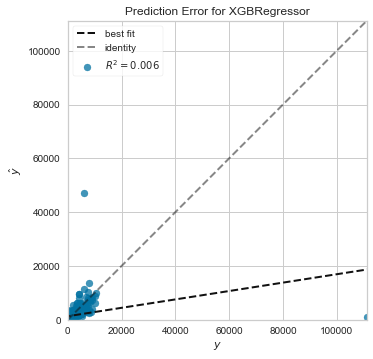

In [38]:
plot_model(tuned_gbr, plot = 'error')


In [102]:
val_pred = predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,252.5,1.291e+05,359.3,0.9275,0.715,5.254


In [103]:
import matplotlib.pyplot as plt

def plot_result(data):
    fig=plt.figure(figsize=(15,5))
    a = data['sale']
    b = data['Label']
    plt.plot(a[:100])
    plt.plot(b[:100])
    plt.show()

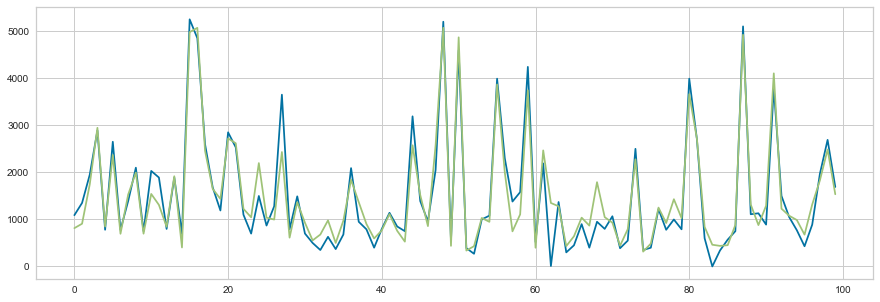

In [104]:
plot_result(val_pred)

In [119]:
def rating(x):
    y = (100) * (2000 -x)/(2000)
    return y

def reverse(y):
    x = -((2000*y) / 100)+2000
    return x

In [124]:
reverse(51)

980.0

# 제출

In [108]:
pred.head()

,years,distance,power,torq,fuel,method,engine,Label
0,0,8000.0,278.0,60.0,디젤,AWD,NaN,6941.165527
1,5,90000.0,163.0,36.7,디젤,FF,4.0,1180.080688
2,8,110000.0,201.0,25.5,가솔린,FF,4.0,1252.452515
3,4,20000.0,78.0,9.6,가솔린,FF,NaN,679.892090
4,3,10000.0,NaN,NaN,가솔린,FF,4.0,1010.302002


In [49]:
submission

,no,가격(만원)
0,11769,6941.165527
1,11770,1180.080688
2,11771,1252.452515
3,11772,679.892090
4,11773,1010.302002
...,...,...
5784,17553,860.372620
5785,17554,1441.678101
5786,17555,392.097137
5787,17556,1274.594604


In [115]:
def save_models(model, save_dir):

    pred = predict_model(model, data=test_df)
    submission['가격(만원)'] = pred['Label']

    save_path = './results/%s/'%(save_dir)
    os.mkdir(save_path)
    submission.to_csv('%s/submission.csv'%save_path, index = False)
    save_model(model, '%s/model'%save_path)

In [116]:
save_models(tuned_gbr, 'sub-1')

Transformation Pipeline and Model Succesfully Saved


In [118]:
save_models(catb, 'sub-2')

Transformation Pipeline and Model Succesfully Saved
